                     REAL TIME ELECTION RESULTS , PORTUGAL 2019
                            DSML CAPSTONE PROJECT

NAME: ANSAR MH

ORGANIZATION: ENTRI ELEVATE

                               PROJECT OVERVIEW
Elections are part of a system that the people selecting one or more for the betterement of the society. And those who winning the election are committed to the society and its people. to serve them , to give them what they wanted and creating a better society without much problems are the aim of it

                               OBJECTIVE
This project is for analysing the results of election happens in portugal 2019. aim of the project to know who habe the strong hold in protugal and what they getting to winning the elections

                                DATA DESCRIPTION
Source : UCI Machine Learning Repository
Link : https://archive.ics.uci.edu/dataset/513/real+time+election+results+portugal+2019
Features : Instances - 21643
           Features - 29

                                  IMPORTING LIBRARIES
NUMPY : Numpy is a python library used for numerical computing
PANDAS : Pandas is a python library used for data manipulation and analysis
SEABORN : Seaborn is a python library designed for creating attractive and informative statistical graphics
MATPLOTLIB : Matplotlib is a python library for vreationg static, animated and interactive visualizations
SciKit Learn : Scikit Learn is a popular python library for machine learning.It provides simple and efficiet tools for data mining and analysis

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler 
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
#LOADING THE DATA
data=pd.read_csv('ElectionData.csv')

In [4]:
#PROCESSING DATA INTO DATAFRAME
df=pd.DataFrame(data)

In [6]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [11]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [15]:
df.shape

(21643, 28)

In [17]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [19]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [21]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [23]:
#CHECKING NULL VALUES
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [25]:
#CHECKING DUPLICATES
df.duplicated().sum()

0

In [27]:
#FINDINGF NUMERICAL COLUMNS
numerical_columns=df.select_dtypes(include='number')
numerical_columns

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,38.29,40.22,147993,94,106
1,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,33.28,34.95,128624,81,77
2,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,6.81,7.15,26307,16,19
3,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.90,5.14,18923,12,5
4,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.19,0.20,332,0,0
21639,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.18,0.19,326,0,0
21640,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.14,0.15,256,0,0
21641,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.13,0.14,239,0,0


Data contains 25 numerical columns 

In [30]:
#FINDING CATEGORICAL COLUMNS
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns

,time,territoryName,Party
0,2019-10-06 20:10:02,Território Nacional,PS
1,2019-10-06 20:10:02,Território Nacional,PPD/PSD
2,2019-10-06 20:10:02,Território Nacional,B.E.
3,2019-10-06 20:10:02,Território Nacional,CDS-PP
4,2019-10-06 20:10:02,Território Nacional,PCP-PEV
...,...,...,...
21638,2019-10-07 00:35:01,Viseu,NC
21639,2019-10-07 00:35:01,Viseu,PNR
21640,2019-10-07 00:35:01,Viseu,MPT
21641,2019-10-07 00:35:01,Viseu,PTP


Data contains 3 categorical columns

                                   DROPPING UNWANTED COLUMNS FROM THE DATA 
Droping the unwanted columns that contains Nan values and some data that is not as important for the project. dropping unwanted columns will give us smooth functioning and quick results without any problems

In [34]:
#DROP UNWANTED COLUMNS
df=df.drop(columns=['time','Party','territoryName'])                    

                                              VISUALIZATION 
Visualization of the data will give you an idea about the complete data. Through visualization we can find outliers, skewness and kurtosis in the data and through that we can make what to use to remove these items to create a good data 

<Axes: >

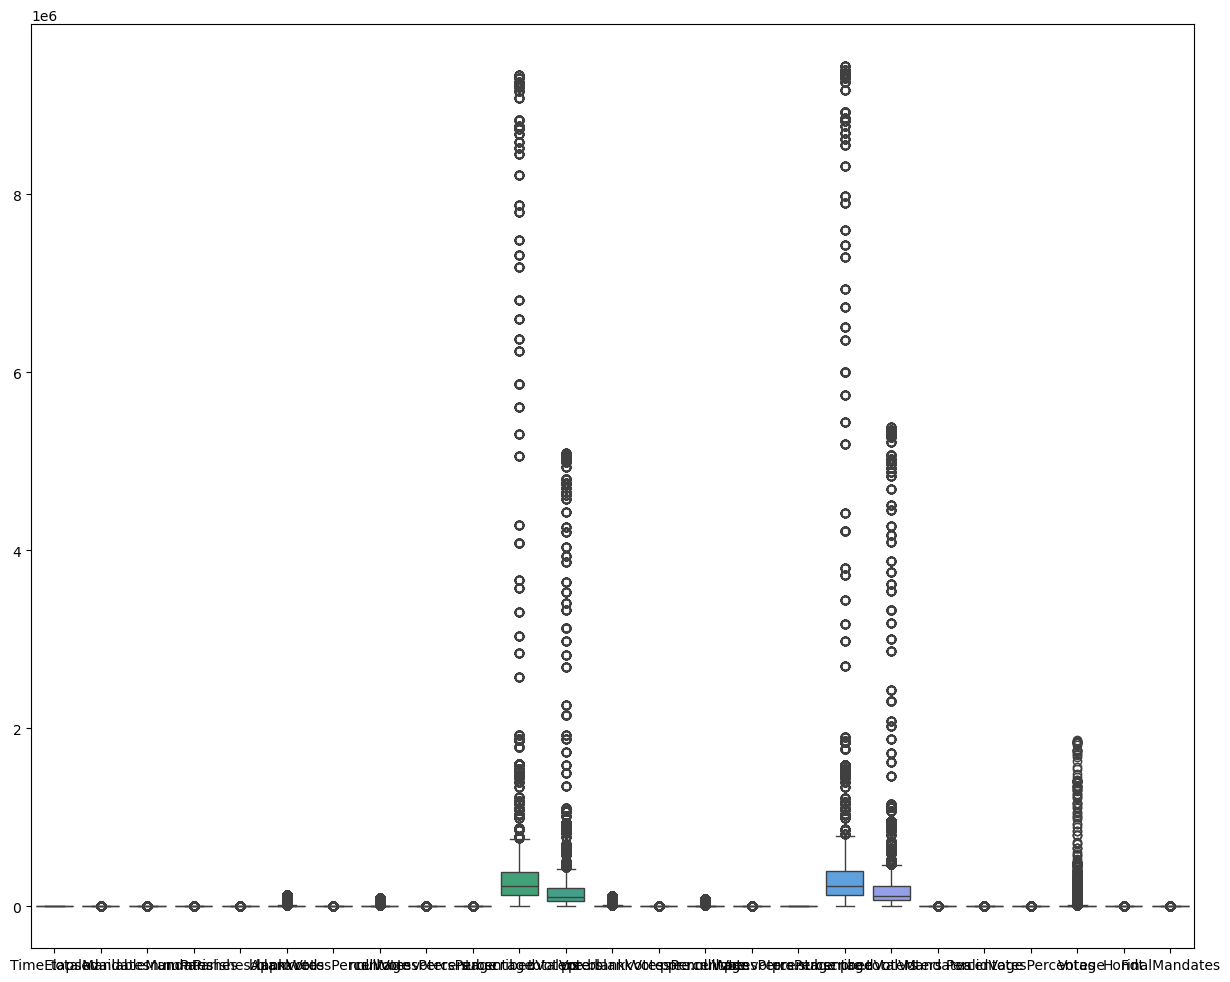

In [37]:
#VISUALIZATION OF DATA 
#BOXPLOT
plt.figure(figsize=(15,12))
sns.boxplot(df)

<Axes: >

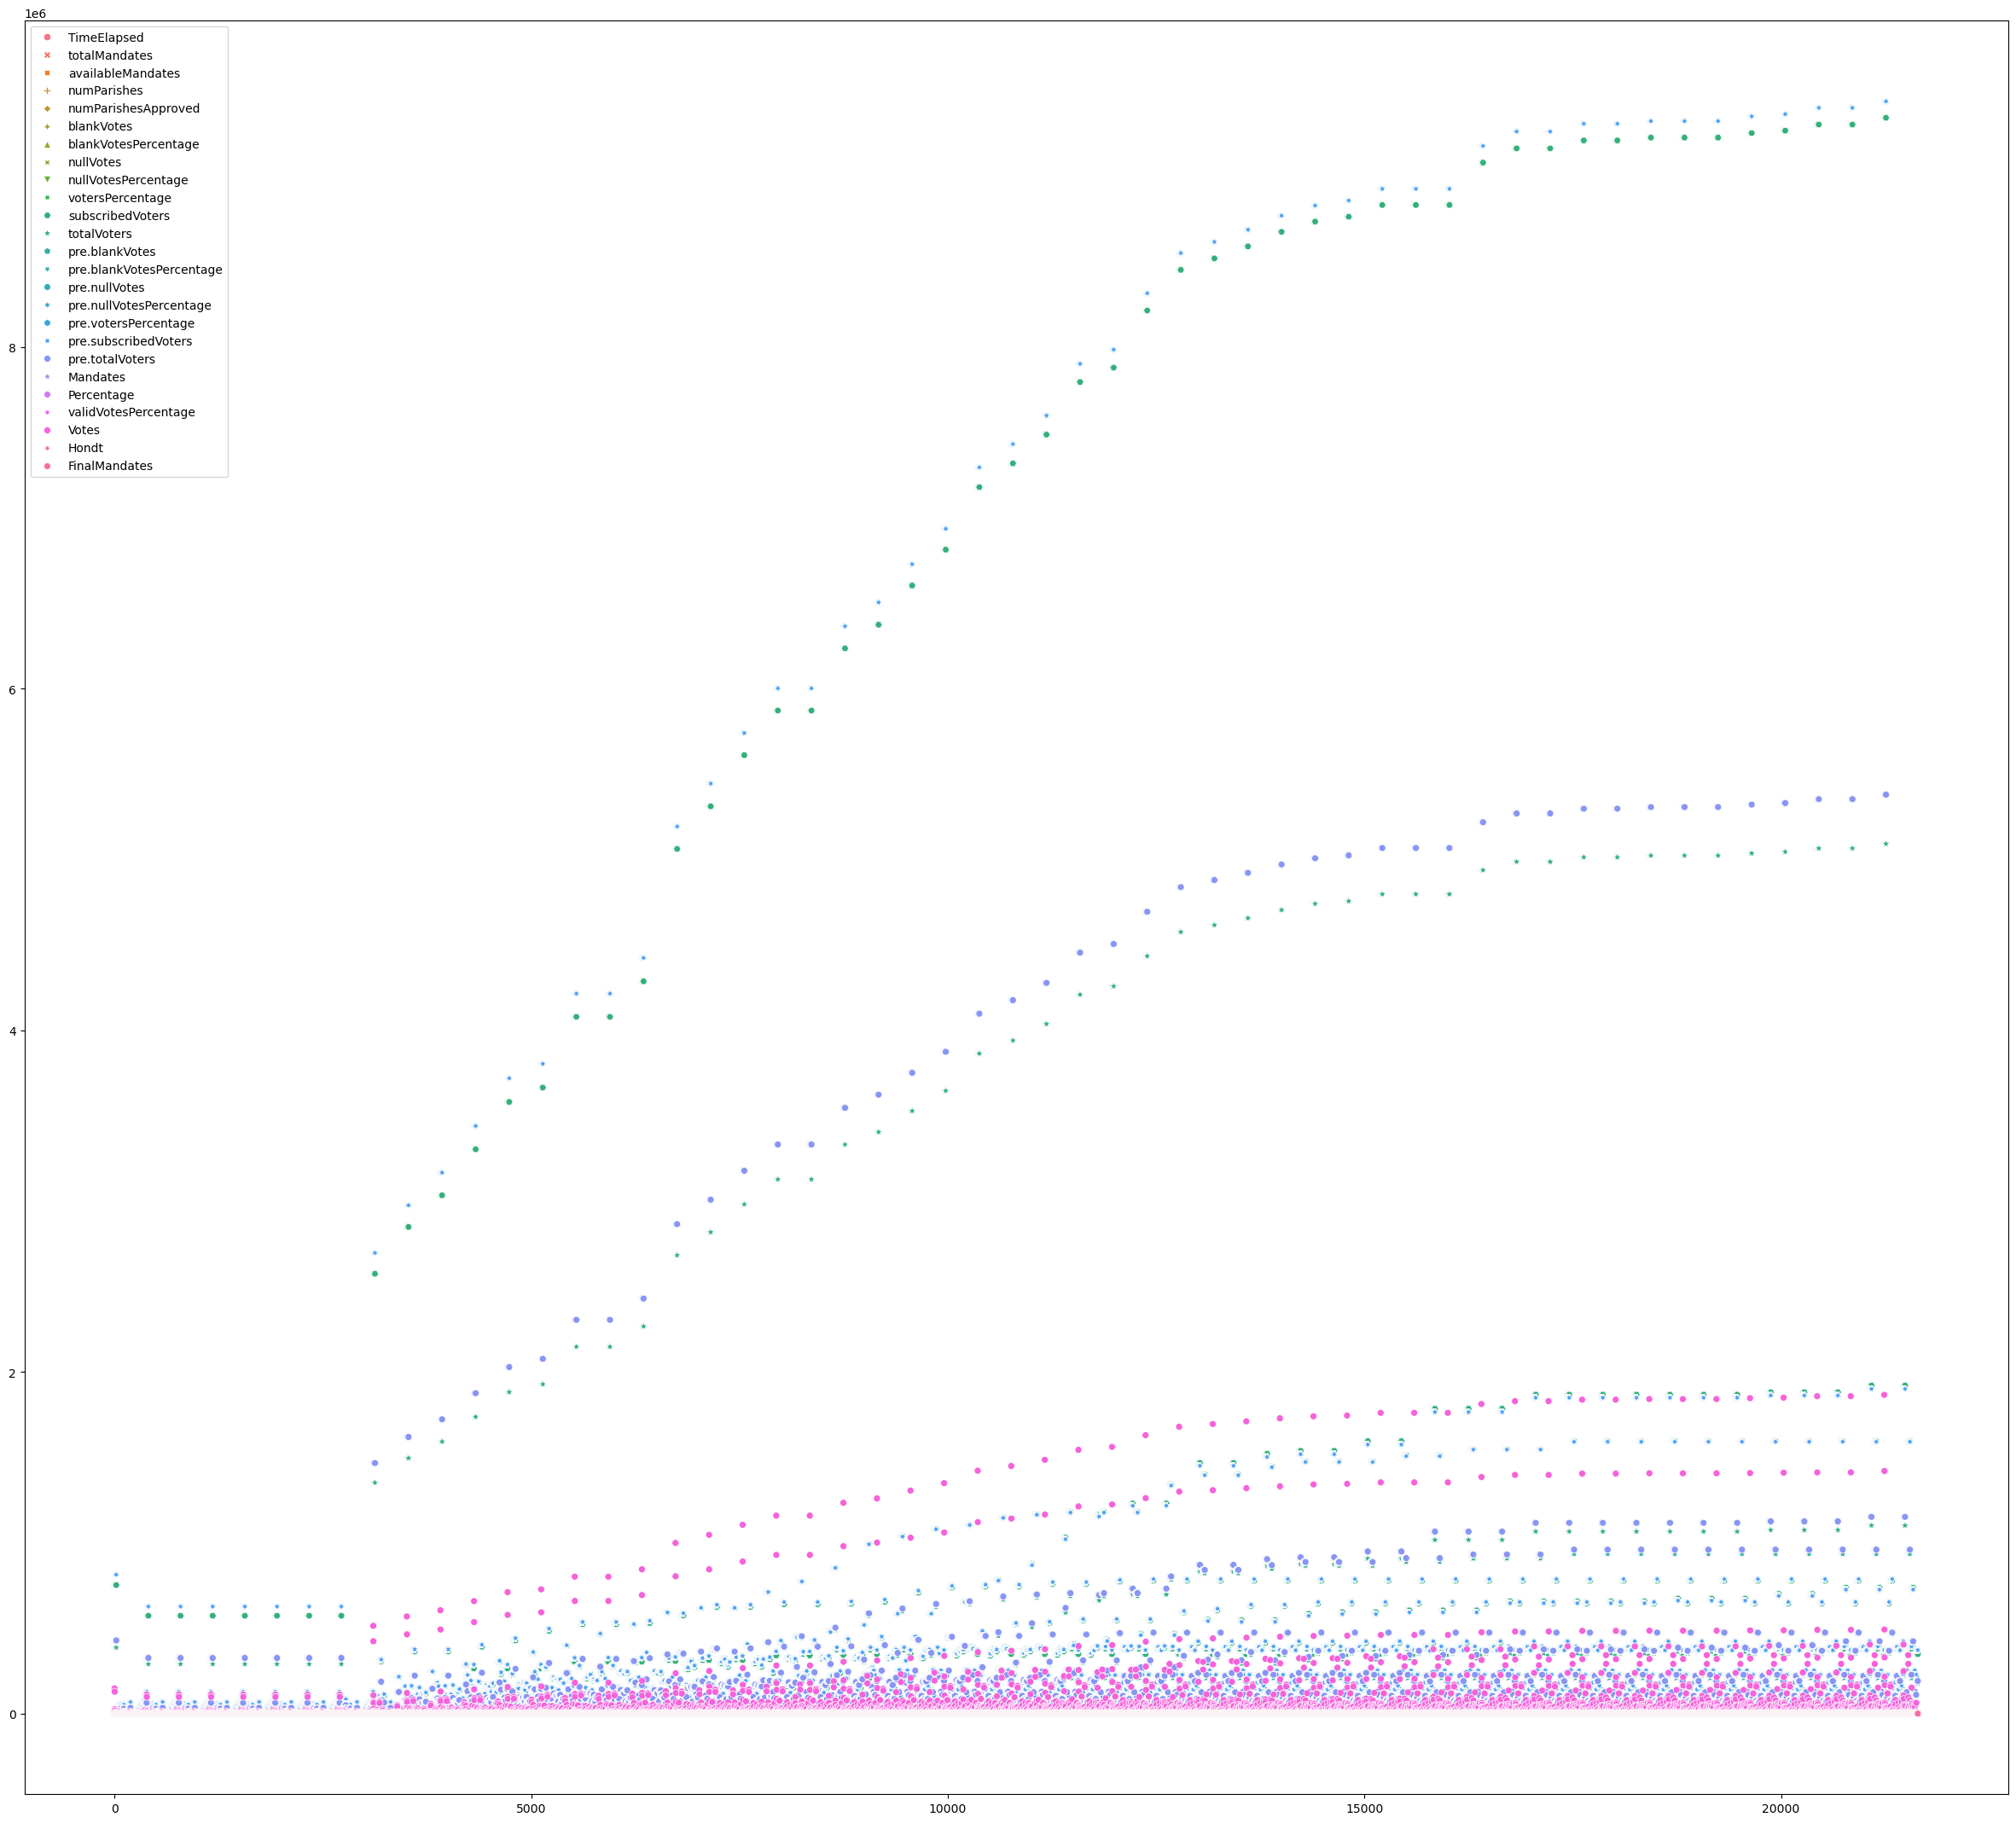

In [49]:
#SCATTERPLOT
plt.figure(figsize=(30,27))
sns.scatterplot(df)

(array([[2.1643e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1643e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1643e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1643e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00

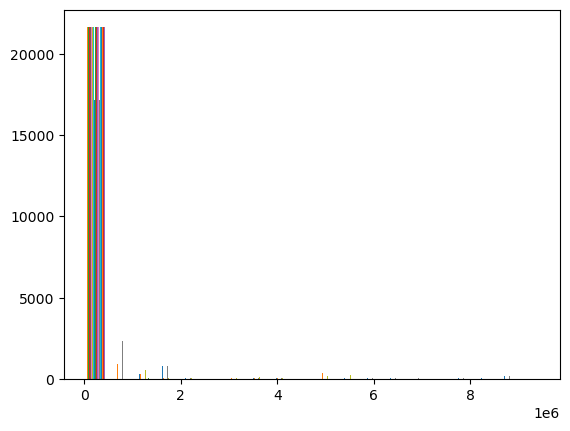

In [38]:
#HISTOGRAM
plt.hist(df,bins=20)

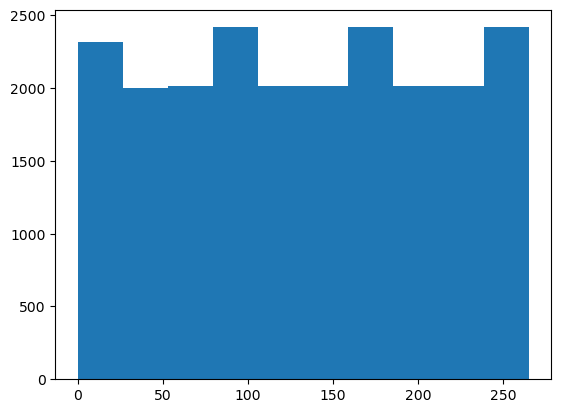

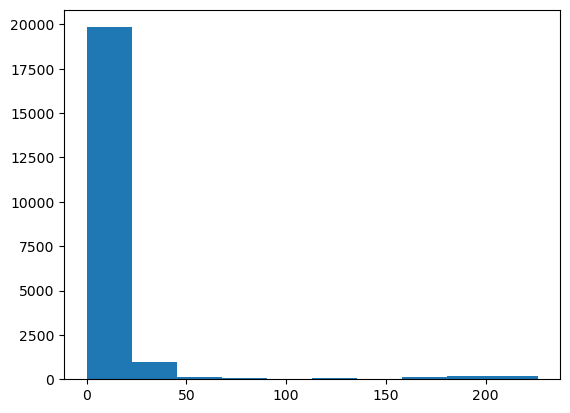

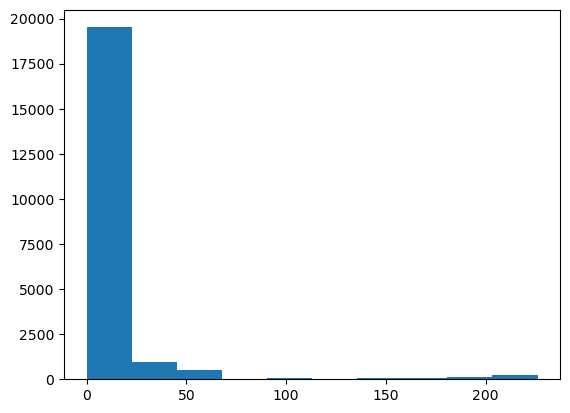

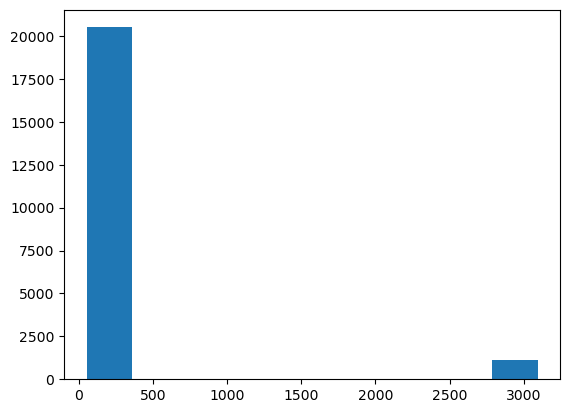

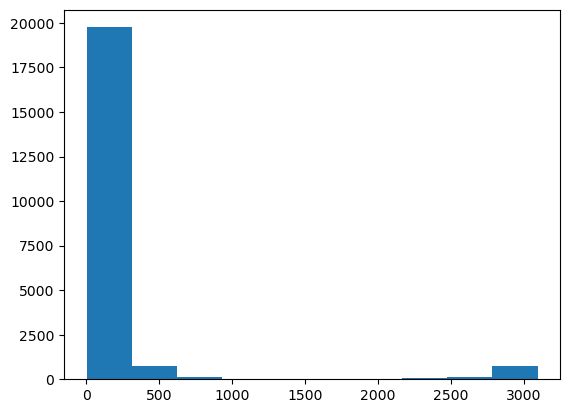

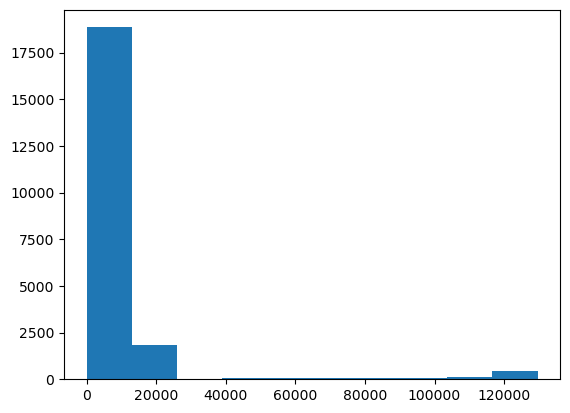

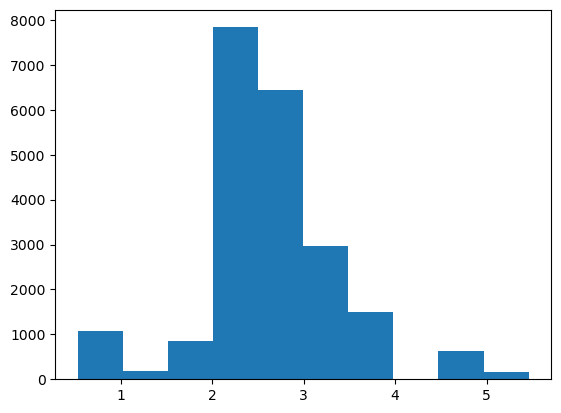

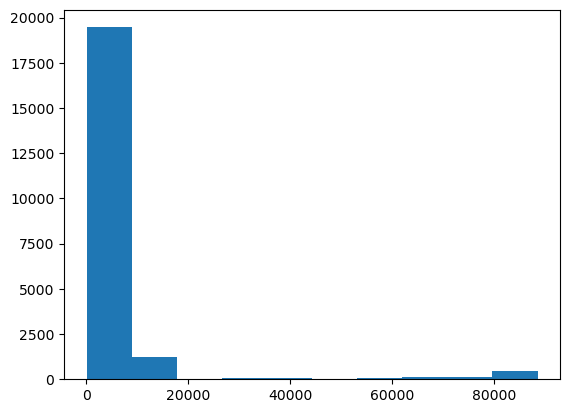

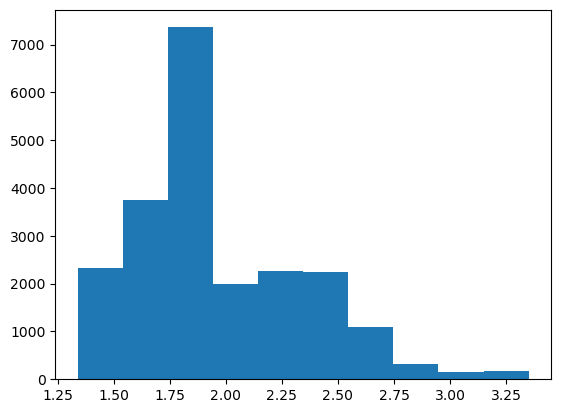

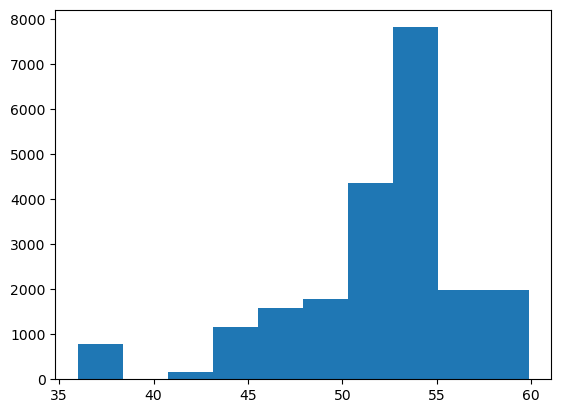

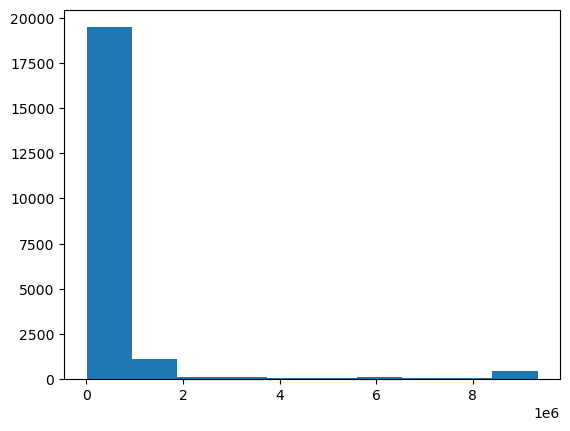

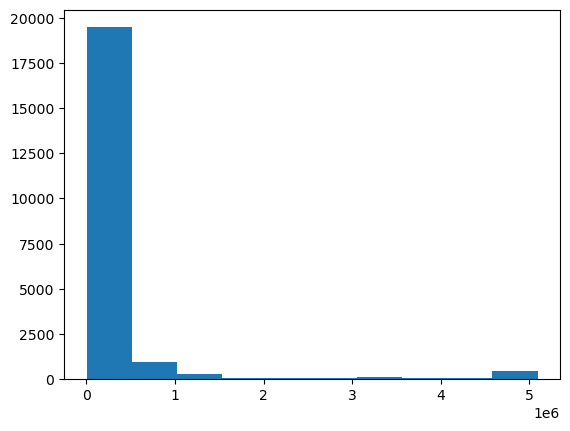

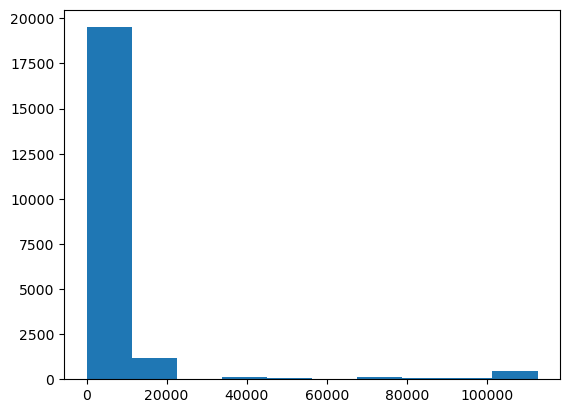

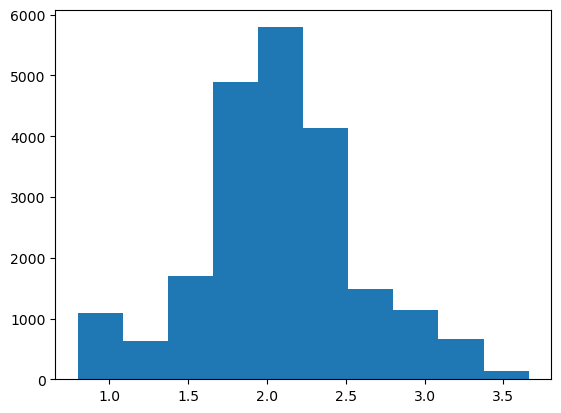

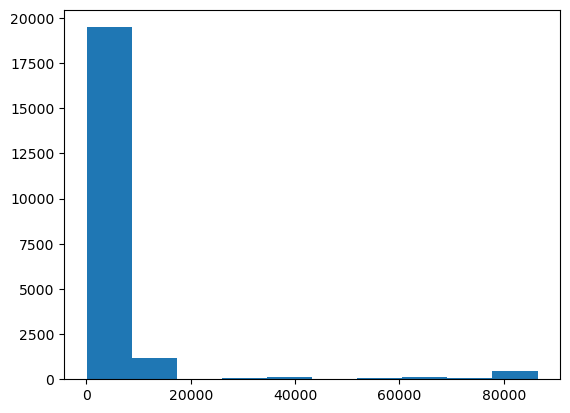

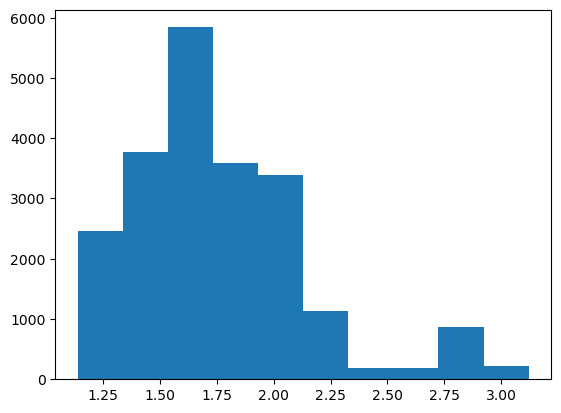

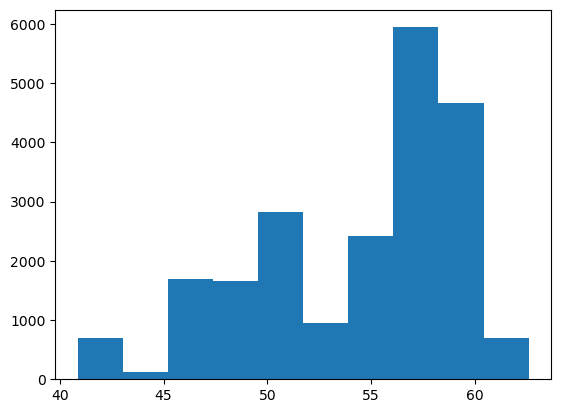

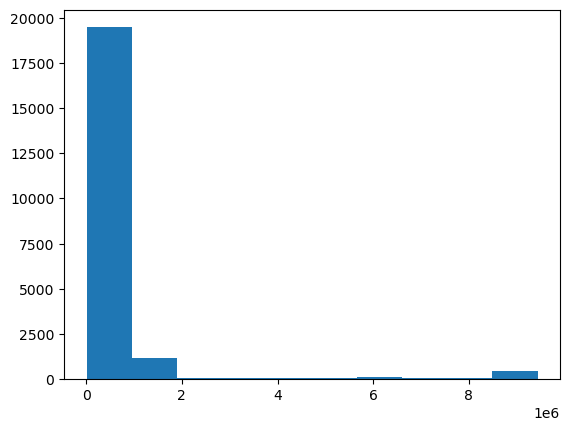

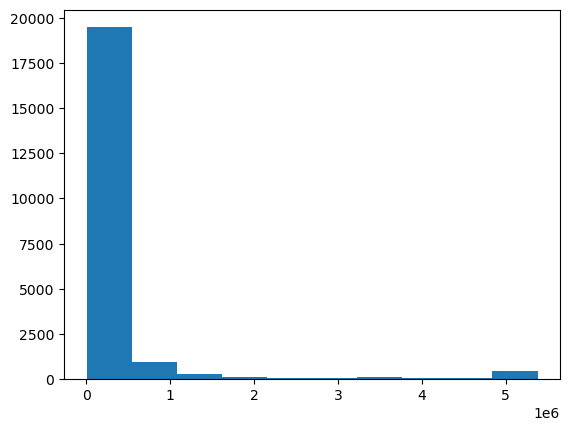

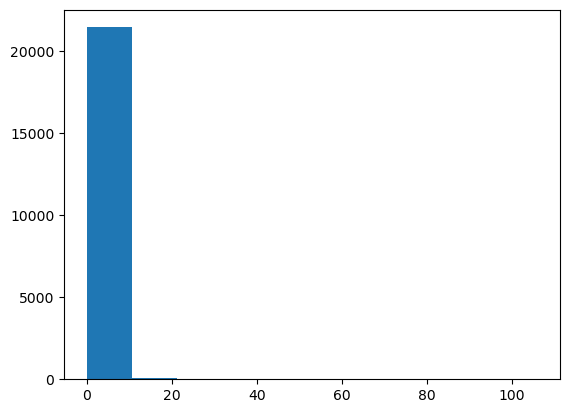

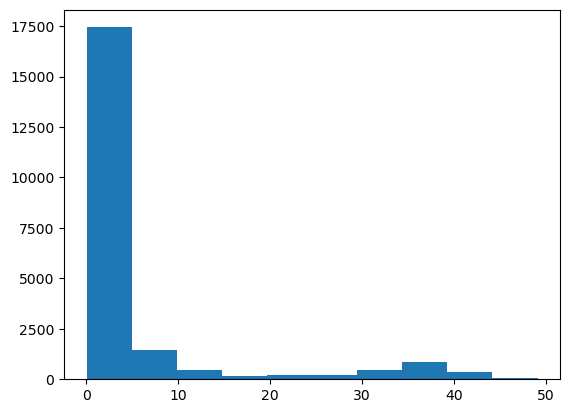

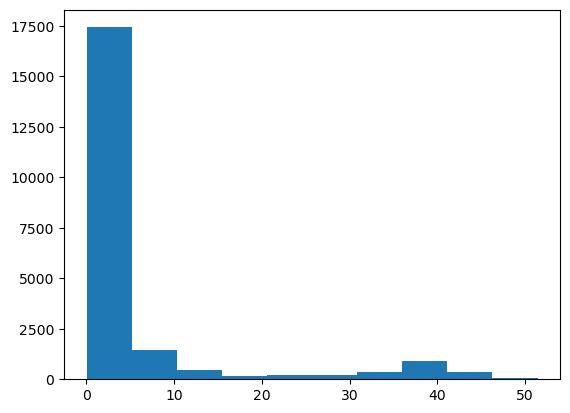

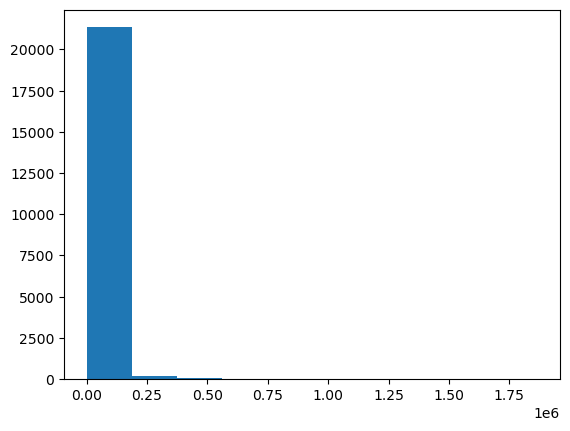

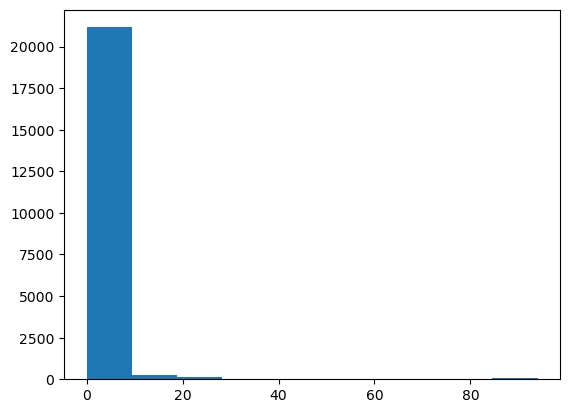

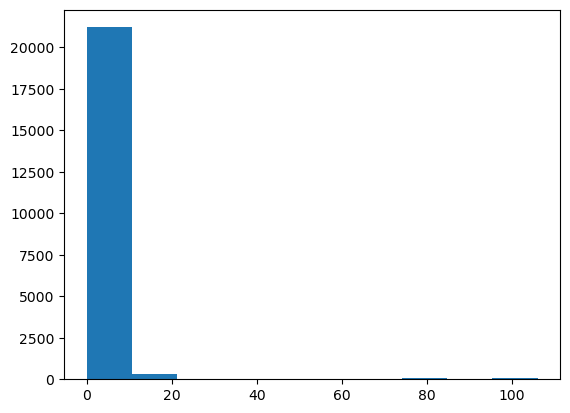

In [41]:
for i in numerical_columns:
    plt.hist(df[i])
    plt.show()

In [43]:
#FINDING OUTLIERS

def outliers(df):
    for col in df.select_dtypes(include=['float64','int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Bound = Q1 - (1.5 * IQR)
        Upper_Bound = Q3 + (1.5 * IQR)

        df[col] = df[col].apply( lambda x : Lower_Bound if x < Lower_Bound else Upper_Bound if x > Upper_Bound else x )

    return df

In [51]:
df1=outliers(df)

In [53]:
df1.head()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,1.91,52.66,789896.0,428546.0,0.0,7.195,7.555,10921.0,0.0,0.0
1,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,1.91,52.66,789896.0,428546.0,0.0,7.195,7.555,10921.0,0.0,0.0
2,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,1.91,52.66,789896.0,428546.0,0.0,6.810,7.150,10921.0,0.0,0.0
3,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,1.91,52.66,789896.0,428546.0,0.0,4.900,5.140,10921.0,0.0,0.0
4,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,1.91,52.66,789896.0,428546.0,0.0,4.590,4.830,10921.0,0.0,0.0


<Axes: >

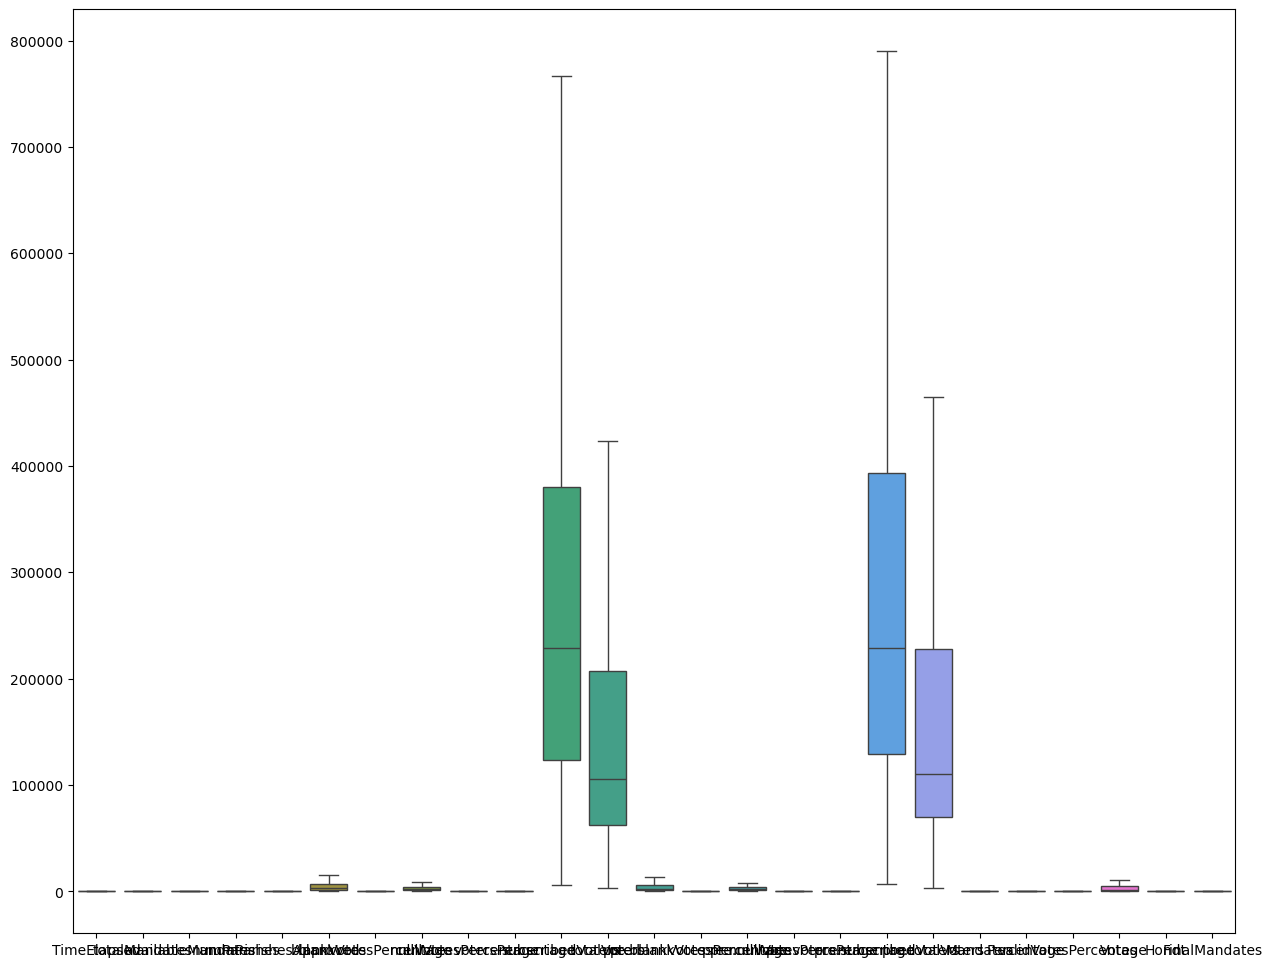

In [55]:
plt.figure(figsize=(15,12))
sns.boxplot(df1)

                                          FEATURE ENGINEERING
Power Transformer method in python is a feature transformation technique. It is useful for stabilizing variance and minimalising skewness in the data . In this project Iam using yeo johnson method which works with both positive and negetive data.

In [ ]:
#FEATURE ENGINEERING
pt=PowerTransformer(method='yeo-johnson')

In [ ]:
numerical_features=df1.select_dtypes(include=['float64','int64']).columns

In [ ]:
df1[numerical_features]=pt.fit_transform(df1[numerical_features])

                                        SKEWNESS AND KURTOSIS
Skewness and Kurtosis are statistical measures used to describe the shape of a data distribution

SKEWNESS
Positive Skewness
Negative Skewness 
Zero Skewness

KURTOSIS
Leptokurtic
Platykurtic
Mesokurtic

In [ ]:
#CHECKING SKEW AND KURTOSIS
df1[numerical_features].skew()

In [ ]:
df2=df1[numerical_features]

                                             CORRELATION
Correlation measures the relationship between two variables,indicating how one variabke changes in relation to another. Itb is widely used in data analysis to identify patterns and relationship

TYPES OF CORRELATION

Positive Correlation : Both variables increase together 
Negative Correlation : One variable increases while the other decreases
No Correlation : No relationship exists between the variables

CORRELATION COEFFICIENT
The strength and direction of a correlation expressed as a correlation coefficient , which ranges from -1 to +1
> +1 : Perfect positive correlation
>  0 : No correlation
> -1 : Perfect negative correlation

In [ ]:
#CORRELATION
correlation=df2.corr()
correlation

In [ ]:
plt.figure(figsize=(27,23))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')

                                       FEATURE SELECTION 
Feature selection is a process used in machine learning and data analysis to identify the most relevant features in a dataset. it helps to improve model perfomance, reduces overfitting, and enhances interpretability

In [ ]:
#FEATURE SELECTION
x=df2.drop('Votes',axis=1)
y=df2['Votes']

In [ ]:
sk=SelectKBest(score_func=f_regression,k=19)
x_num=sk.fit_transform(x,y)

In [ ]:
selected_features=x.columns[sk.get_support()]
feature_scores=pd.DataFrame({'feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending=False)

print("selected features:",selected_features)
print("\nfeature scores:")
print(feature_scores)

In [ ]:
x_selected=x[selected_features]

In [ ]:
x_selected.columns

In [ ]:
#SCALING
scaler=StandardScaler()

In [ ]:
x_scaled=scaler.fit_transform(x_selected)

In [ ]:
#DATA SPLITTING
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
print(f"""
x train shape:{x_train.shape}
x test shape:{x_test.shape}
y train shape:{y_train.shape}
y test shape:{y_test.shape}
""")

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
#MODEL BUILDING - REGRESSION MODELS
models={
    '1.linear regression':LinearRegression(),
    '2.decision tree regressor':DecisionTreeRegressor(),
    '3.random forest regressor':RandomForestRegressor(),
    '4.gradient boosting regressor':GradientBoostingRegressor(),
    '5.svr':SVR()
}

In [ ]:
#EVALUATION
result={}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    result[model_name]={'mae':mae,'mse':mse,'rmse':rmse,'r2':r2}

In [ ]:
result_df=pd.DataFrame(result).T
result_df

In [ ]:
#BEST MODEL ESTIMATOR
best_model=result_df.sort_values(by='r2',ascending=False).iloc[0]
print('best_model',best_model)

In [ ]:
#HYPERPARAMETER TUNING
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

In [ ]:
best_model=grid_search.best_estimator_
best_model.fit(x_train_scaled,y_train)

y_test_pred=best_model.predict(x_test_scaled)

test_mae=mean_absolute_error(y_test,y_test_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
test_r2=r2_score(y_test,y_test_pred)

print(f"test mae:{test_mae}")
print(f"test mse:{test_mse}")
print(f"test rmse:{test_rmse}")
print(f"test r2:{test_r2}")

In [ ]:
y_train_pred=best_model.predict(x_train_scaled)
residuals=y_train-y_train_pred

In [ ]:
#PIPELINE CREATION
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(random_state=42))
])

In [ ]:
pipeline.fit(x_train,y_train)

In [ ]:
joblib.dump(pipeline,"rfr_pipeline.joblib")

In [ ]:
loaded_pipeline=joblib.load('rfr_pipeline.joblib')

In [ ]:
#PREDICTION 
unseen_data=pd.read_csv('Unseen.csv')

In [ ]:
df_unseen=pd.DataFrame(unseen_data)

In [ ]:
df_unseen.head()

In [ ]:
df_unseen.shape

In [ ]:
df_unseen.info()

In [ ]:
x_unseen=df_unseen.drop('validVotesPercentage',axis=1)
y_unseen=df_unseen['validVotesPercentage']

In [ ]:
y_pred_unseen=loaded_pipeline.predict(x_unseen)

In [ ]:
unseen_mae=mean_absolute_error(y_unseen,y_pred_unseen)
unseen_mse=mean_squared_error(y_unseen,y_pred_unseen)
unseen_rmse=np.sqrt(mean_squared_error(y_unseen,y_pred_unseen))
unseen_r2=r2_score(y_unseen,y_pred_unseen)

print(f"unseen mae:{unseen_mae}")
print(f"unseen mse:{unseen_mse}")
print(f"unseen rmse:{unseen_rmse}")
print(f"unseen r2:{unseen_r2}")

In [ ]:
df_unseen['predicted_election_result']=y_pred_unseen
df_unseen.to_csv('unseen_predictions.csv',index=False)
print("prediction saved to'unseen_prediction.csv'.")

In [ ]:
predicted_df=pd.read_csv('unseen_predictions.csv')
predicted_df.head(20)

In [ ]:
predicted_df.tail(20)